<a href="https://colab.research.google.com/github/starjay88/Crash-Data-Analysis-Project/blob/main/Crash_data_science_project/code/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science project**

**Crash Data Analysis project**

**Team Info**

Wonjae Hwang, Tony Baez-Ortiz

contact: whwang@angelo.edu, jbaezortiz@angelo.edu

Introduction to Data Science (CS-4330-D10)

Angelo State University


**Project Repo**

URL: https://github.com/starjay88/Crash-Data-Analysis-Project


**Problem Statement**

Traffic accidents continue to occur in our lives. Reducing them is a public goal. This project analyzes traffic accidents that occurred in the Montgomery, Maryland area. This project analyzes how time of day, weather, and other features affect accident frequency and injury severity, and identifies the locations of accidents. Understanding the relationships derived from these findings will help develop traffic safety policies and reduce traffic accidents.

**Objectives**

Identify accident patterns based on time, weather, and other features in the Montgomery, Maryland area.

Analyze data sets to identify consistent risk factors.

Visualize the relationship between each factor and accident frequency and injury severity.



**Methodology**

1. Data Collection
  - Collect datasets from the U.S. open government data website as CSV files.

2. Data preprocessing
  - Remove missing Values.
  - Convert columns into consistent formats.
  - Extract relevant variables such as crash time, weather, and location.

3. Exploratory Data Analysis (EDA)
  - Visualize crash frequency and injury severity by timezone, weather, and location
  - Use 'matplotlib' & 'seaborn'
  - Shows the accident location

4. Interpretation
  - Explain each visualization with new insights

In [37]:
import pandas as pd

In [38]:
import seaborn as sns

In [39]:
import matplotlib.pyplot as plt


**Data Collection**

**Data Sources**
D1, D2, D3

*D1 includes car accident information such as crash time/date, weather, location, latitude, longitude, location.*

Size: 116093 records and 37 features.

In [40]:
import pandas as pd
D1 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", low_memory=False)
display(D1.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3304001X,250035441,MONTGOMERY,Property Damage Crash,08/09/2025 05:15:00 AM,No,NaN,NaN,NaN,0,...,Parked Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,38.995967,-77.038263,"(38.9959665, -77.038263)"
1,MCP3126006Z,250037626,MONTGOMERY,Property Damage Crash,08/22/2025 07:29:00 PM,No,NaN,NaN,NaN,0,...,"Other Fixed Object (wall, building, tunnel, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,39.280249,-77.314678,"(39.28024876, -77.31467843)"
2,MCP32120045,250037277,MONTGOMERY,Property Damage Crash,08/20/2025 05:22:00 PM,No,NaN,NaN,NaN,0,...,Curb,Not Applicable,NaN,NaN,NaN,NaN,NaN,39.180267,-77.265217,"(39.18026696, -77.26521726)"
3,MCP3055004Y,250036749,MONTGOMERY,Property Damage Crash,07/31/2025 02:00:00 PM,NaN,NaN,NaN,NaN,0,...,Parked Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,39.090164,-77.069313,"(39.090164, -77.069313)"
4,MCP3126006X,250037402,MONTGOMERY,Injury Crash,08/21/2025 05:21:00 PM,No,Maryland (State) Route,Northbound,Lane 1,3,...,Motor Vehicle In Transport,NaN,Non-Junction,NaN,Straight,No Defects,Not Divided,39.219796,-77.257416,"(39.219796, -77.25741635)"


In [41]:
numerical_features = D1.select_dtypes(include=['int64','float64']).columns
categorical_features = D1.select_dtypes(include=['object']).columns
print(numerical_features)
print(categorical_features)

Index(['Distance', 'Latitude', 'Longitude'], dtype='object')
Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance Unit',
       'Road Grade', 'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'At Fault', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Junction',
       'Intersection Type', 'Road Alignment', 'Road Condition',
       'Road Division', 'Location'],
      dtype='object')


In [42]:
D1.shape

(116093, 37)

In [43]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116093 entries, 0 to 116092
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Report Number                 116093 non-null  object 
 1   Local Case Number             116093 non-null  object 
 2   Agency Name                   116093 non-null  object 
 3   ACRS Report Type              116093 non-null  object 
 4   Crash Date/Time               116093 non-null  object 
 5   Hit/Run                       112599 non-null  object 
 6   Route Type                    100487 non-null  object 
 7   Lane Direction                101357 non-null  object 
 8   Lane Type                     25789 non-null   object 
 9   Number of Lanes               103754 non-null  object 
 10  Direction                     101399 non-null  object 
 11  Distance                      103262 non-null  float64
 12  Distance Unit                 103766 non-nul

In [44]:
D1.describe(include = "all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
count,116093,116093,116093,116093,116093,112599,100487,101357,25789,103754,...,115443,29680,87170,53491,100989,96089,100209,116093.000000,116093.000000,116093
unique,116093,115980,10,3,113251,2,19,38,194,97,...,66,64,22,11,12,21,35,NaN,NaN,115222
top,MCP30900090,15000166,Montgomery County Police,Property Damage Crash,05/22/2015 09:55:00 PM,No,Maryland (State),North,Lane 1,2,...,OTHER VEHICLE,OTHER VEHICLE,INTERSECTION,FOUR-WAY INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",NaN,NaN,"(38.953, -77.338)"
freq,1,2,78093,76464,5,94140,39121,25905,7024,32670,...,66578,12119,32164,30613,74048,80463,39861,NaN,NaN,26
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.084214,-77.114063,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072631,0.099041,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.025718,-77.191530,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.075842,-77.107302,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140672,-77.040413,NaN


*D2 includes car accident information such as crash time/date, weather, location, vehicle model, and surface Condition, driver substance Abuse, latitude, longitude, location.*

Size: 204688 records and 39 features.

In [45]:
D2 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)
display(D2.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3126006X,250037402,MONTGOMERY,Injury Crash,08/21/2025 05:21:00 PM,Maryland (State) Route,NaN,NaN,NaN,NaN,...,Northbound,40,No,No,2013,KIA,SOUL,39.219796,-77.257416,"(39.219796, -77.25741635)"
1,MCP2349001B,250037516,MONTGOMERY,Property Damage Crash,08/22/2025 10:44:00 AM,Interstate (State),EISENHOWER MEMORIAL HWY,NaN,NaN,NaN,...,Northbound,55,No,No,0,NaN,NaN,39.180181,-77.250657,"(39.18018079, -77.25065714)"
2,MCP296500BC,250033157,MONTGOMERY,Property Damage Crash,07/25/2025 11:55:00 AM,Bicycle Route,NaN,NEW HAMPSHIRE AVE (SB/L) NORBECK RD (WB/L) SPE...,NaN,NaN,...,Westbound,40,No,No,2023,LEXUS,RX,39.121219,-76.988905,"(39.12121898, -76.98890509)"
3,MCP2159003K,250037509,MONTGOMERY,Property Damage Crash,08/22/2025 10:36:00 AM,Maryland (State) Route,NaN,NaN,NaN,NaN,...,Southbound,30,No,No,2003,TOYOTA,SIENNA,39.207931,-77.141480,"(39.20793083, -77.1414795)"
4,MCP312900D6,250034573,MONTGOMERY,Property Damage Crash,08/03/2025 02:10:00 PM,NaN,NaN,NaN,Parking Lot Way PARKING LOT OF 2741 UNI...,NaN,...,Not On Roadway,0,No,No,2023,SUBARU,IMPREZA,39.039662,-77.057238,"(39.03966248, -77.05723843)"


In [46]:
numerical_features = D2.select_dtypes(include=['int64','float64']).columns
categorical_features = D2.select_dtypes(include=['object']).columns
print(numerical_features)
print(categorical_features)

Index(['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude'], dtype='object')
Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Make', 'Vehicle Model', 'Location'],
      dtype='object')


In [47]:
D2.shape

(204688, 39)

In [48]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204688 entries, 0 to 204687
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  204688 non-null  object 
 1   Local Case Number              204688 non-null  object 
 2   Agency Name                    204688 non-null  object 
 3   ACRS Report Type               204688 non-null  object 
 4   Crash Date/Time                204688 non-null  object 
 5   Route Type                     184185 non-null  object 
 6   Road Name                      181178 non-null  object 
 7   Cross-Street Name              167930 non-null  object 
 8   Off-Road Description           18997 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6652 non-null    object 
 11  Collision Type                 204103 non-null  object 
 12  Weather                       

In [49]:
D2.describe(include = "all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
count,204688,204688,204688,204688,204688,184185,181178,167930,18997,19126,...,196292,204688.000000,204688,203162,204688.000000,203764,203722,204688.000000,204688.000000,204688
unique,115360,115249,10,3,112545,19,4672,7462,13543,20,...,10,NaN,2,2,NaN,1959,7147,NaN,NaN,114502
top,MCP229800RC,200022715,Montgomery County Police,Property Damage Crash,12/10/2018 06:10:00 PM,Maryland (State),GEORGIA AVE,GEORGIA AVE,PARKING LOT,ROCKVILLE,...,North,NaN,No,No,NaN,TOYOTA,4S,NaN,NaN,"(38.953, -77.338)"
freq,10,10,138376,131059,11,77077,11596,2340,132,9320,...,47647,NaN,203936,199804,NaN,29411,13753,NaN,NaN,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.197100,NaN,NaN,1965.387829,NaN,NaN,39.083024,-77.112057,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.319145,NaN,NaN,341.817851,NaN,NaN,0.071813,0.098073,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.000000,NaN,NaN,2006.000000,NaN,NaN,39.024417,-77.189237,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.000000,NaN,NaN,2012.000000,NaN,NaN,39.074819,-77.105158,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.000000,NaN,NaN,2016.000000,NaN,NaN,39.139626,-77.039198,NaN


*D3 includes car accident information such as crash time/date, weather, location, driver substance Abuse, latitude, longitude, location.*

Size: 6883 records and 29 features.

In [50]:
D3 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD")

In [51]:
numerical_features = D3.select_dtypes(include=['int64','float64']).columns
categorical_features = D3.select_dtypes(include=['object']).columns
print(numerical_features)
print(categorical_features)

Index(['Local Case Number', 'Latitude', 'Longitude'], dtype='object')
Index(['Report Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time',
       'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Pedestrian Type', 'Pedestrian Movement', 'Pedestrian Actions',
       'Pedestrian Location', 'At Fault', 'Injury Severity',
       'Safety Equipment', 'Location'],
      dtype='object')


In [52]:
D3.shape

(6883, 29)

In [53]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Report Number                 6883 non-null   object 
 1   Local Case Number             6883 non-null   int64  
 2   Agency Name                   6883 non-null   object 
 3   ACRS Report Type              6883 non-null   object 
 4   Crash Date/Time               6883 non-null   object 
 5   Route Type                    5313 non-null   object 
 6   Road Name                     5248 non-null   object 
 7   Cross-Street Name             4880 non-null   object 
 8   Off-Road Description          1480 non-null   object 
 9   Municipality                  624 non-null    object 
 10  Related Non-Motorist          6883 non-null   object 
 11  Collision Type                6705 non-null   object 
 12  Weather                       6425 non-null   object 
 13  Sur

In [54]:
D3.describe(include = "all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
count,6883,6.883000e+03,6883,6883,6883,5313,5248,4880,1480,624,...,6883,6681,6589,6730,6596,6883,3954,6883.000000,6883.000000,6883
unique,6555,NaN,10,3,6539,18,1195,1719,1381,13,...,19,19,81,36,3,10,29,NaN,NaN,6547
top,MCP2291005S,NaN,Montgomery County Police,Injury Crash,02/12/2022 04:11:00 PM,County,GEORGIA AVE,GEORGIA AVE,PARKING LOT,ROCKVILLE,...,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,No,SUSPECTED MINOR INJURY,NONE,NaN,NaN,"(39.01002068, -77.11475414)"
freq,5,NaN,4421,6155,5,2006,319,114,8,333,...,4034,3044,2882,1503,4407,2478,2862,NaN,NaN,5
mean,NaN,1.662041e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.072634,-77.111451,NaN
std,NaN,9.570482e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068984,0.092023,NaN
min,NaN,1.705200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.554005,-79.181926,NaN
25%,NaN,1.705114e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.015581,-77.183383,NaN
50%,NaN,2.000040e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.061734,-77.100526,NaN
75%,NaN,2.300172e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.122918,-77.045104,NaN


**Data Preprocessing & Exploratory Data Analysis (EDA)**

**Seaborn single feature plots**

**D1 histplot, kdeplot, countplot, boxplot, violinplot**

**Explanation** :
In this section, we are performing exploratory data analysis (EDA) on the D1 dataset by creating single-feature plots. The purpose of these visualizations is to understand the distribution and frequency of individual variables within the dataset. We have focused on visualizing geographical features like Latitude and Longitude, as well as the categorical feature 'Weather'. These plots help us identify patterns such as areas with a high concentration of crashes and the most prevalent weather conditions during accidents in the Montgomery, Maryland area.

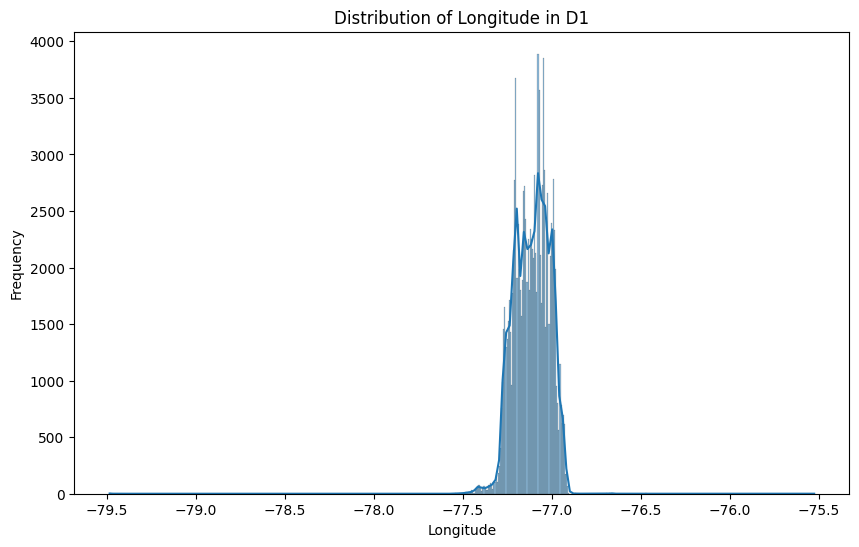

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=D1, x='Longitude', kde=True)
plt.title('Distribution of Longitude in D1')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

**Interpretation**:
Let's interpret the histplot showing the distribution of 'Longitude' in D1 (cell `1c135238`).

This plot visualizes the frequency of different longitude values in the dataset, essentially showing the geographical distribution of crashes along the east-west axis.

*   The **bars** represent ranges of longitude values, and the height of each bar indicates how many crashes occurred within that longitude range.
*   The **KDE line** (the smooth curve) provides a smoothed estimate of the distribution's shape.

From this plot, we can observe:

*   The **range of longitudes** where crashes occurred in this dataset.
*   The **areas with the highest concentration** of crashes along the east-west axis, corresponding to the tallest bars or the peaks in the KDE line.
*   Whether the distribution is **unimodal** (one main peak) or **multimodal** (multiple peaks), and if it's **symmetrical** or **skewed**.

For instance, a prominent peak at a certain longitude would suggest that a significant number of crashes in the dataset occurred around that east-west location within Montgomery, Maryland.

In [56]:
# Standardize categorical columns in D1
for col in D1.select_dtypes(include=['object']).columns:
    D1[col] = D1[col].str.lower().str.strip()

display(D1.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,mcp3304001x,250035441,montgomery,property damage crash,08/09/2025 05:15:00 am,no,NaN,NaN,NaN,0,...,parked vehicle,NaN,NaN,NaN,NaN,NaN,NaN,38.995967,-77.038263,"(38.9959665, -77.038263)"
1,mcp3126006z,250037626,montgomery,property damage crash,08/22/2025 07:29:00 pm,no,NaN,NaN,NaN,0,...,"other fixed object (wall, building, tunnel, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,39.280249,-77.314678,"(39.28024876, -77.31467843)"
2,mcp32120045,250037277,montgomery,property damage crash,08/20/2025 05:22:00 pm,no,NaN,NaN,NaN,0,...,curb,not applicable,NaN,NaN,NaN,NaN,NaN,39.180267,-77.265217,"(39.18026696, -77.26521726)"
3,mcp3055004y,250036749,montgomery,property damage crash,07/31/2025 02:00:00 pm,NaN,NaN,NaN,NaN,0,...,parked vehicle,NaN,NaN,NaN,NaN,NaN,NaN,39.090164,-77.069313,"(39.090164, -77.069313)"
4,mcp3126006x,250037402,montgomery,injury crash,08/21/2025 05:21:00 pm,no,maryland (state) route,northbound,lane 1,3,...,motor vehicle in transport,NaN,non-junction,NaN,straight,no defects,not divided,39.219796,-77.257416,"(39.219796, -77.25741635)"


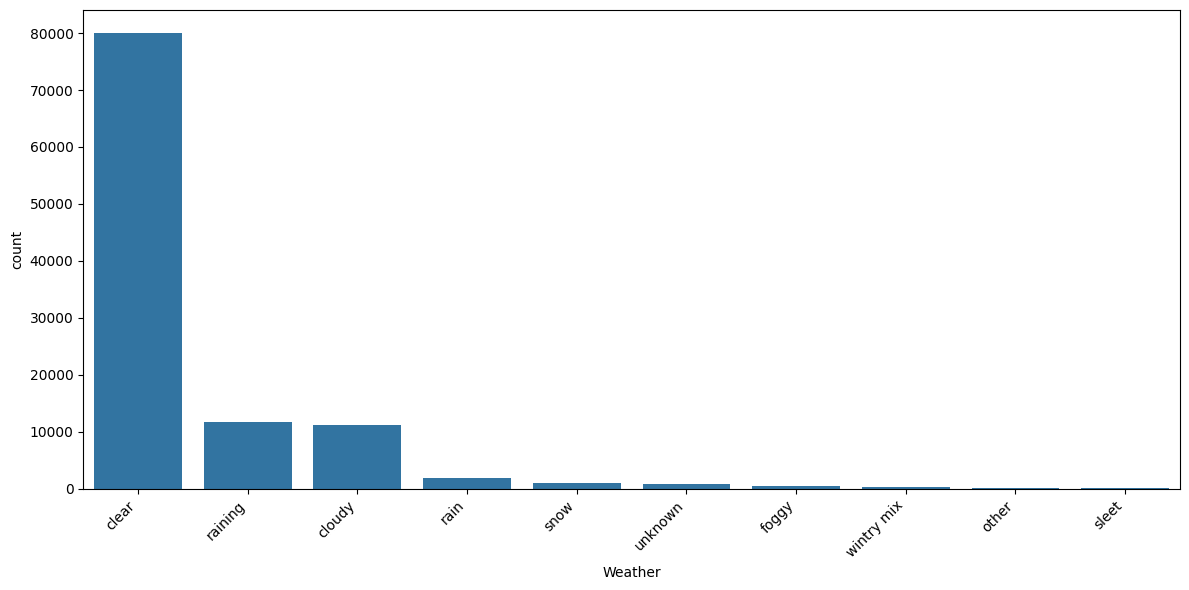

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent weather conditions
top_weather = D1['Weather'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top weather conditions
D1_filtered_weather = D1[D1['Weather'].isin(top_weather)]

# Create the countplot with filtered data
plt.figure(figsize=(12, 6))
sns.countplot(data=D1_filtered_weather, x='Weather', order=top_weather)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation**:
This countplot shows the frequency of the top 10 most common weather conditions in the D1 dataset after standardizing the categorical data.

Based on the plot:

*   The most frequent weather condition is **clear**. This suggests that a majority of accidents in the dataset occurred during clear weather.
*   The next most frequent conditions are **rain** and **cloudy**.
*   Conditions like **snow**, **fog**, and **sleet** are much less frequent compared to clear, rain, and cloudy conditions.

This visualization helps in understanding the weather conditions under which most accidents happen in the Montgomery, Maryland area, according to this dataset.

**D2 histplot, kdeplot, countplot, boxplot, violinplot**

**Explanation** :
In this section, we are performing exploratory data analysis (EDA) on the D2 dataset by creating single-feature plots. The purpose of these visualizations is to understand the distribution and frequency of individual variables within this dataset, which contains more detailed vehicle information. We have focused on visualizing numerical features like 'Speed Limit' and geographical features like Latitude and Longitude, as well as categorical features like 'Weather'. These plots help us understand the characteristics of crashes recorded in D2.

In [58]:
# Standardize categorical columns in D2
for col in D2.select_dtypes(include=['object']).columns:
    D2[col] = D2[col].str.lower().str.strip()

display(D2.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,mcp3126006x,250037402,montgomery,injury crash,08/21/2025 05:21:00 pm,maryland (state) route,NaN,NaN,NaN,NaN,...,northbound,40,no,no,2013,kia,soul,39.219796,-77.257416,"(39.219796, -77.25741635)"
1,mcp2349001b,250037516,montgomery,property damage crash,08/22/2025 10:44:00 am,interstate (state),eisenhower memorial hwy,NaN,NaN,NaN,...,northbound,55,no,no,0,NaN,NaN,39.180181,-77.250657,"(39.18018079, -77.25065714)"
2,mcp296500bc,250033157,montgomery,property damage crash,07/25/2025 11:55:00 am,bicycle route,NaN,new hampshire ave (sb/l) norbeck rd (wb/l) spe...,NaN,NaN,...,westbound,40,no,no,2023,lexus,rx,39.121219,-76.988905,"(39.12121898, -76.98890509)"
3,mcp2159003k,250037509,montgomery,property damage crash,08/22/2025 10:36:00 am,maryland (state) route,NaN,NaN,NaN,NaN,...,southbound,30,no,no,2003,toyota,sienna,39.207931,-77.141480,"(39.20793083, -77.1414795)"
4,mcp312900d6,250034573,montgomery,property damage crash,08/03/2025 02:10:00 pm,NaN,NaN,NaN,parking lot way parking lot of 2741 uni...,NaN,...,not on roadway,0,no,no,2023,subaru,impreza,39.039662,-77.057238,"(39.03966248, -77.05723843)"


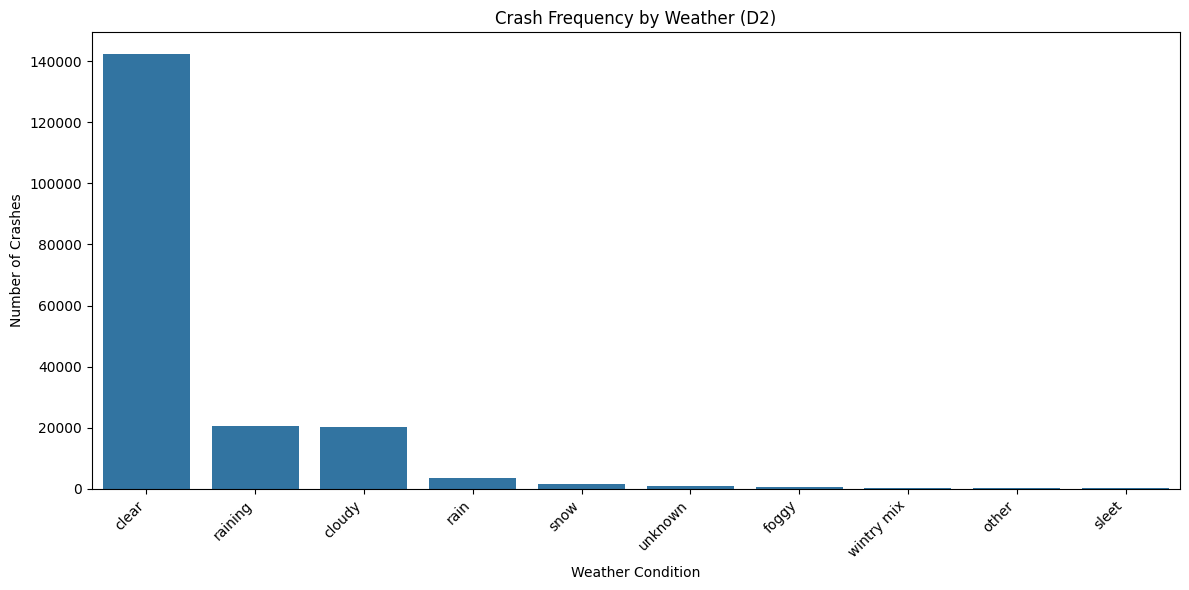

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most frequent weather conditions in D2
top_weather_D2 = D2['Weather'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top weather conditions
D2_filtered_weather = D2[D2['Weather'].isin(top_weather_D2)]

# Create the countplot of Weather
plt.figure(figsize=(12, 6))
sns.countplot(data=D2_filtered_weather, x='Weather', order=top_weather_D2)
plt.xticks(rotation=45, ha='right')
plt.title('Crash Frequency by Weather (D2)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

**Interpretation** :
This plot shows the frequency of the top 10 most common weather conditions recorded in the D2 dataset, which focuses on vehicle-related crash information.

Based on the height of the bars:

*   Similar to the D1 dataset, **'clear'** weather is the most frequently recorded condition during crashes in D2.
*   **'Rain'** and **'cloudy'** conditions are the next most frequent.
*   Other conditions like 'snow', 'fog', 'sleet', etc., occur much less frequently in this dataset as well.

This visualization confirms that, in the D2 dataset, the majority of recorded crashes happen during clear weather, followed by rain and cloudy conditions.

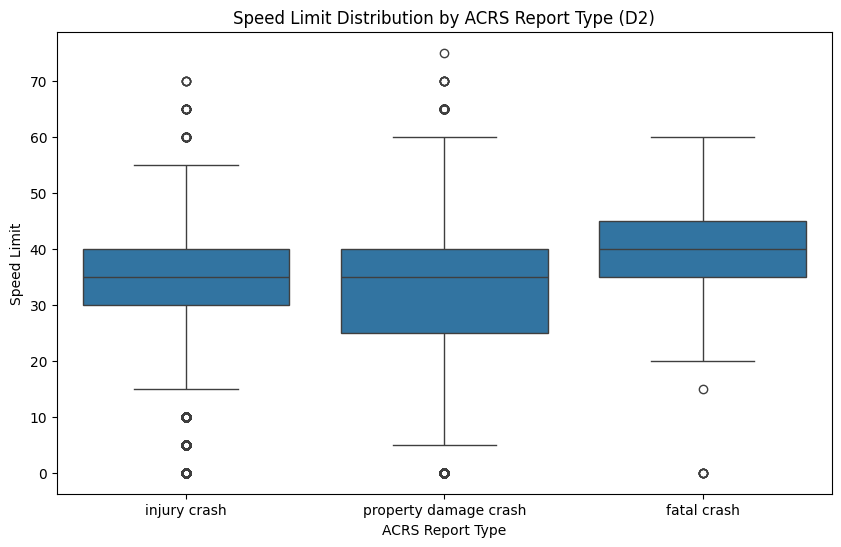

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=D2, x='ACRS Report Type', y='Speed Limit')
plt.title('Speed Limit Distribution by ACRS Report Type (D2)')
plt.xlabel('ACRS Report Type')
plt.ylabel('Speed Limit')
plt.show()

**Interpretation**:
Let's interpret the boxplot of 'Speed Limit' vs 'ACRS Report Type'. This plot shows the distribution of speed limits at the location of crashes, categorized by the severity of the crash.

Looking at the boxplots for each 'ACRS Report Type':

*   **Property Damage Crash:** Observe the box for 'Property Damage Crash'. The box represents the interquartile range (IQR), with the line inside indicating the median speed limit for these types of crashes. The "whiskers" extend to show the range of the data, excluding outliers, which are plotted as individual points.
*   **Injury Crash:** Compare the boxplot for 'Injury Crash' to the 'Property Damage Crash' boxplot. Is the median speed limit higher or lower? Is the spread of speed limits (the height of the box and whiskers) different? Are there more or fewer outliers, and at what speed limits do they occur?
*   **Fatal Crash:** Do the same comparison for the 'Fatal Crash' boxplot. Given that fatal crashes are the most severe, we might hypothesize that they occur at higher speed limits. See if the boxplot supports this – is the median speed limit higher, and are the upper quartile and whiskers extending to higher speed limits compared to the other crash types?

**Potential Insights:**

*   If the boxplot for 'Fatal Crash' is shifted upwards compared to 'Injury Crash' and 'Property Damage Crash', with a higher median and upper quartile, it would suggest that fatal crashes are indeed more likely to occur in areas with higher speed limits.
*   The presence and location of outliers can also be informative. High speed limit outliers in injury or fatal crashes might point to specific locations or circumstances where high speeds contribute to severe outcomes.

By comparing the central tendency (median), spread (IQR and whiskers), and outliers across the three boxplots, you can draw conclusions about the relationship between speed limit and crash severity in the D2 dataset.

**D3 histplot, kdeplot, countplot, boxplot, violinplot**

**Explanation** :
In this section, we are performing exploratory data analysis (EDA) on the D3 dataset by creating single-feature plots. Since this dataset focuses on pedestrian-involved crashes, these visualizations aim to understand the distribution and frequency of individual variables relevant to these types of accidents. We have focused on visualizing features such as 'Injury Severity', 'Pedestrian Type', and geographical features like Latitude and Longitude. These plots help us identify patterns and characteristics specific to pedestrian crashes in the Montgomery, Maryland area.

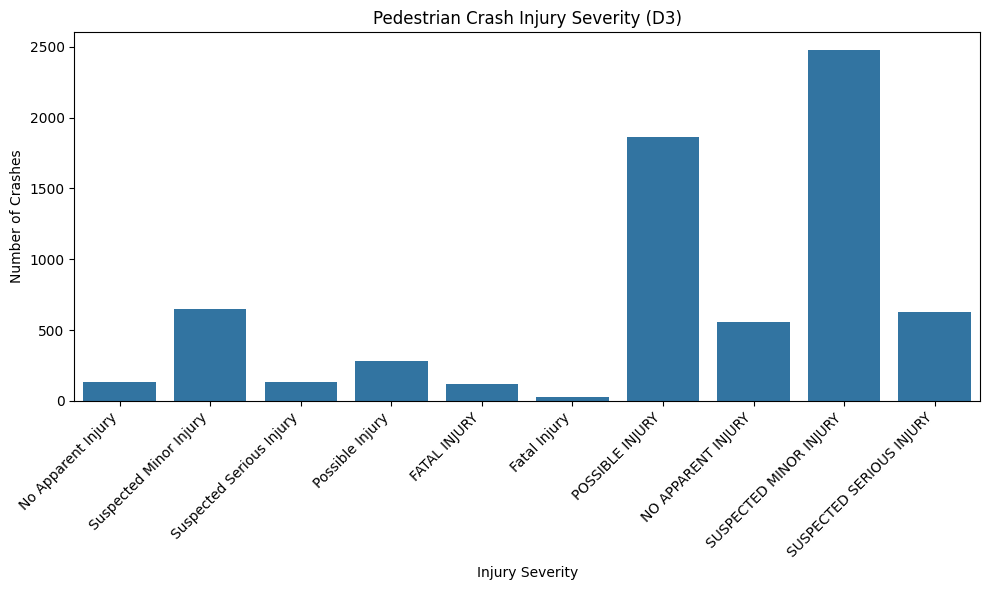

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of Injury Severity in D3
plt.figure(figsize=(10, 6))
sns.countplot(data=D3, x='Injury Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Pedestrian Crash Injury Severity (D3)')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

**Interpretation**:
This countplot shows the frequency of different injury severity levels recorded in pedestrian-involved crashes in the D3 dataset.

Based on the height of the bars:

*   The most frequent injury severity level is **'suspected minor injury'**. This indicates that a significant number of pedestrian crashes in this dataset resulted in injuries that were suspected to be minor.
*   The next most frequent is **'no apparent injury'**, suggesting that in a notable number of cases, pedestrians involved in crashes did not show obvious signs of injury.
*   **'Possible injury'** and **'suspected serious injury'** also occur, but less frequently than minor or no apparent injuries.
*   **'Fatal injury'** is the least frequent outcome shown on the plot, which is expected but highlights the most severe consequence of these crashes.

This visualization provides a clear overview of the distribution of injury outcomes for pedestrians involved in crashes in the Montgomery, Maryland area, according to this dataset.

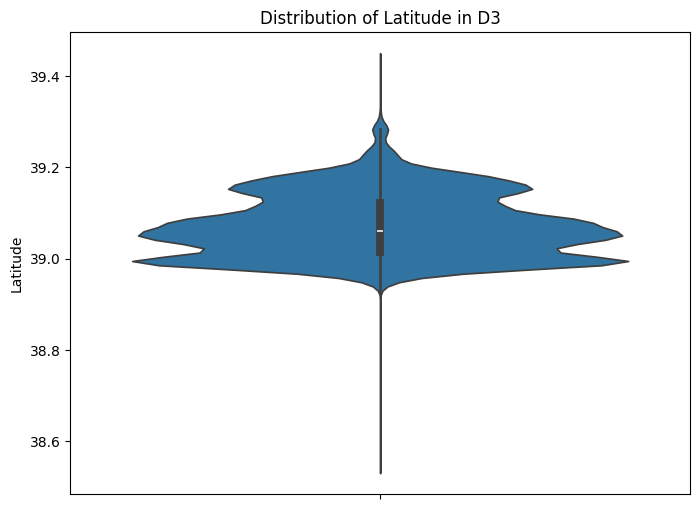

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(data=D3, y='Latitude')
plt.title('Distribution of Latitude in D3')
plt.ylabel('Latitude')
plt.show()

**Interpretation**:
Let's interpret the violin plot of 'Latitude' in D3 (cell `7372df4f`).

This violin plot shows the distribution of the latitude coordinates for the pedestrian crashes in the D3 dataset.

*   The **width** of the violin shape at any given latitude level indicates the density of crash locations at that latitude. A wider section means more crashes occurred at latitudes within that range.
*   The **thick bar** inside the violin represents the interquartile range (IQR), similar to a boxplot, and the **white dot** is the median latitude.
*   The **thin line** extending from the thick bar covers the range of the data within 1.5 times the IQR.

From this plot, we can observe:

*   Where the majority of pedestrian crashes are geographically concentrated along the north-south axis (based on where the violin is widest).
*   The median latitude of the crashes.
*   The overall range of latitudes covered by the dataset.

For example, if the widest part of the violin is around a certain latitude value, it suggests that the highest density of pedestrian crashes in this dataset occurred at that approximate north-south location within Montgomery, Maryland. The tails of the violin show the less frequent latitudes where crashes occurred.

**Two feature plots in seaborn**

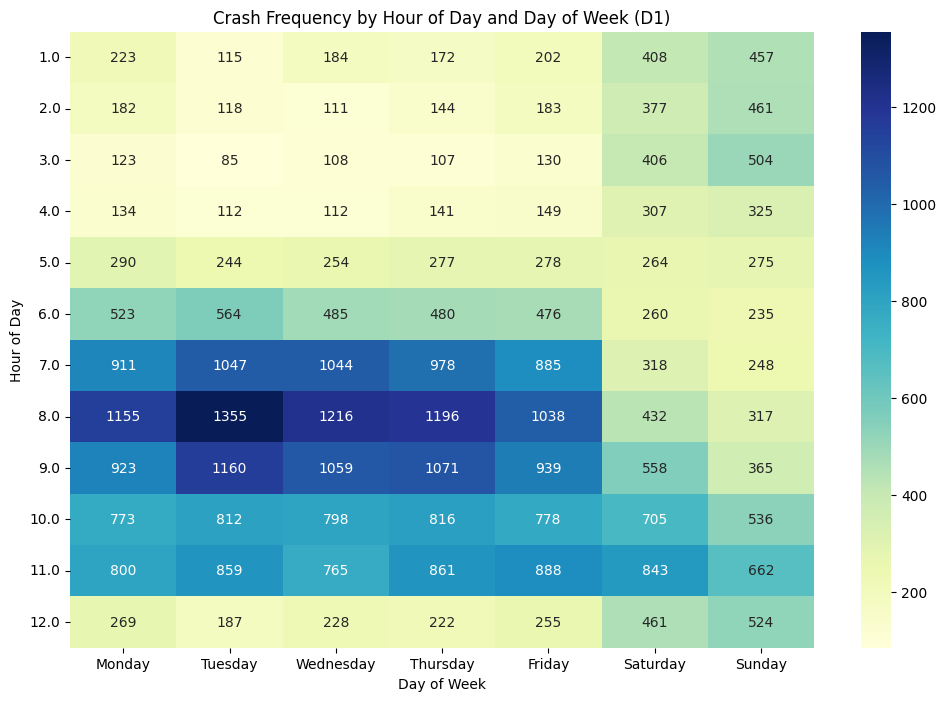

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Crash Date/Time' to datetime objects if not already done
D1['Crash Date/Time'] = pd.to_datetime(D1['Crash Date/Time'], errors='coerce')

# Extract hour of day and day of week
D1['Crash Hour'] = D1['Crash Date/Time'].dt.hour
D1['Crash Day of Week'] = D1['Crash Date/Time'].dt.day_name()

# Group by hour and day of week and count crashes
crash_by_hour_day = D1.groupby(['Crash Hour', 'Crash Day of Week']).size().unstack(fill_value=0)

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex columns to ensure correct order of days
crash_by_hour_day = crash_by_hour_day[day_order]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crash_by_hour_day, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crash Frequency by Hour of Day and Day of Week (D1)')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.yticks(rotation=0)
plt.show()

**Interpretation**:
Let's interpret the crash frequency heatmap for D1 (cell `cd4170e3`). This heatmap shows the number of crashes that occurred at each hour of the day (y-axis) on each day of the week (x-axis). The intensity of the color in each cell indicates the frequency of crashes, with darker colors representing higher frequencies.

Here are some observations from the heatmap:

*   **Peak Times:** You can observe darker shades in certain rows, indicating the hours of the day with the highest crash frequencies across most days. Look for the rows with the most intense colors – these likely correspond to peak commute times.
*   **Peak Days:** Similarly, look for columns with generally darker shades, indicating the days of the week with higher overall crash frequencies.
*   **Weekday vs. Weekend Patterns:** Compare the patterns on weekdays (Monday to Friday) with those on weekends (Saturday and Sunday). Do the peak hours differ? Are crashes more spread out on weekends?
*   **Specific Hotspots:** Identify specific cells (intersections of hour and day) with the darkest colors. These represent the exact hours on specific days when crashes are most frequent. For example, you might see a dark cell at 5 PM on a Friday.

By analyzing the color intensity across the heatmap, you can pinpoint the times of day and days of the week that are most prone to crashes in the D1 dataset.

/tmp/ipython-input-3768857348.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  D3['Crash Date/Time'] = pd.to_datetime(D3['Crash Date/Time'], errors='coerce')


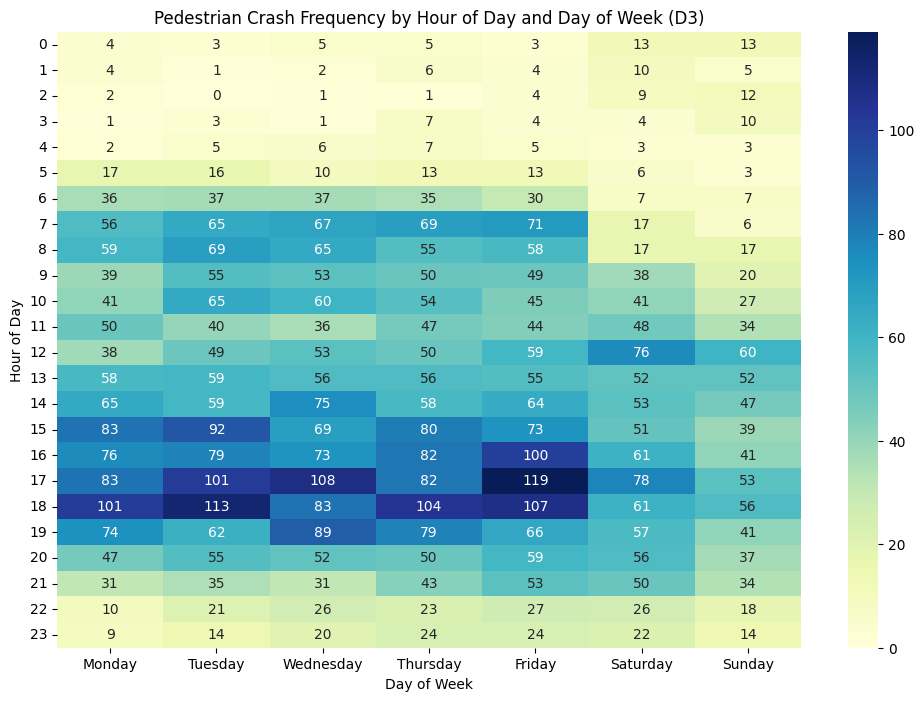

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Crash Date/Time' to datetime objects if not already done
D3['Crash Date/Time'] = pd.to_datetime(D3['Crash Date/Time'], errors='coerce')

# Extract hour of day and day of week
D3['Crash Hour'] = D3['Crash Date/Time'].dt.hour
D3['Crash Day of Week'] = D3['Crash Date/Time'].dt.day_name()

# Group by hour and day of week and count crashes
crash_by_hour_day_D3 = D3.groupby(['Crash Hour', 'Crash Day of Week']).size().unstack(fill_value=0)

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex columns to ensure correct order of days
crash_by_hour_day_D3 = crash_by_hour_day_D3[day_order]

# Create a heatmap for D3
plt.figure(figsize=(12, 8))
sns.heatmap(crash_by_hour_day_D3, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Pedestrian Crash Frequency by Hour of Day and Day of Week (D3)')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.yticks(rotation=0)
plt.show()

**Interpretation - Comparison of D1 and D3 Heatmaps:**

Let's compare the crash frequency heatmaps for D1 (general crashes) and D3 (pedestrian crashes).

1.  **Overall Frequency:** Visually, the D1 heatmap generally shows higher frequencies (darker colors and larger numbers) across most hours and days compared to the D3 heatmap. This is expected as D1 includes all types of crashes, while D3 is limited to pedestrian-involved crashes, which are less frequent overall.

2.  **Peak Hours:**
    *   In the **D1 heatmap**, you likely see prominent dark bands during typical rush hour times on weekdays (e.g., around 7-9 AM and 4-6 PM). This reflects the high volume of vehicle traffic during commutes.
    *   In the **D3 heatmap**, the peak hours for pedestrian crashes might be slightly different. Look for the darkest cells in D3. Are they also concentrated during rush hour? Or are there other peak times, perhaps related to school hours, lunch breaks, or evening activities when more pedestrians are out? You might see peaks in the afternoon or early evening.

3.  **Peak Days:**
    *   For **general crashes (D1)**, weekdays often show higher overall crash counts than weekends, especially during rush hours.
    *   For **pedestrian crashes (D3)**, compare the weekday patterns to the weekend patterns. Are pedestrian crashes more evenly distributed throughout the day on weekends? Are there specific days (like Fridays or Saturdays) that stand out for pedestrian crashes?

4.  **Specific Differences:** Look for any hours or days where the pattern is significantly different between the two heatmaps. For example, is there a particular hour in the late evening or early morning that has a relatively higher frequency of pedestrian crashes compared to general crashes?

By comparing the intensity and location of the darker cells in both heatmaps, you can identify key differences in when general crashes versus pedestrian crashes are most likely to occur. This can provide valuable insights for targeted traffic safety initiatives.

**Many relationship visualization in pandas**

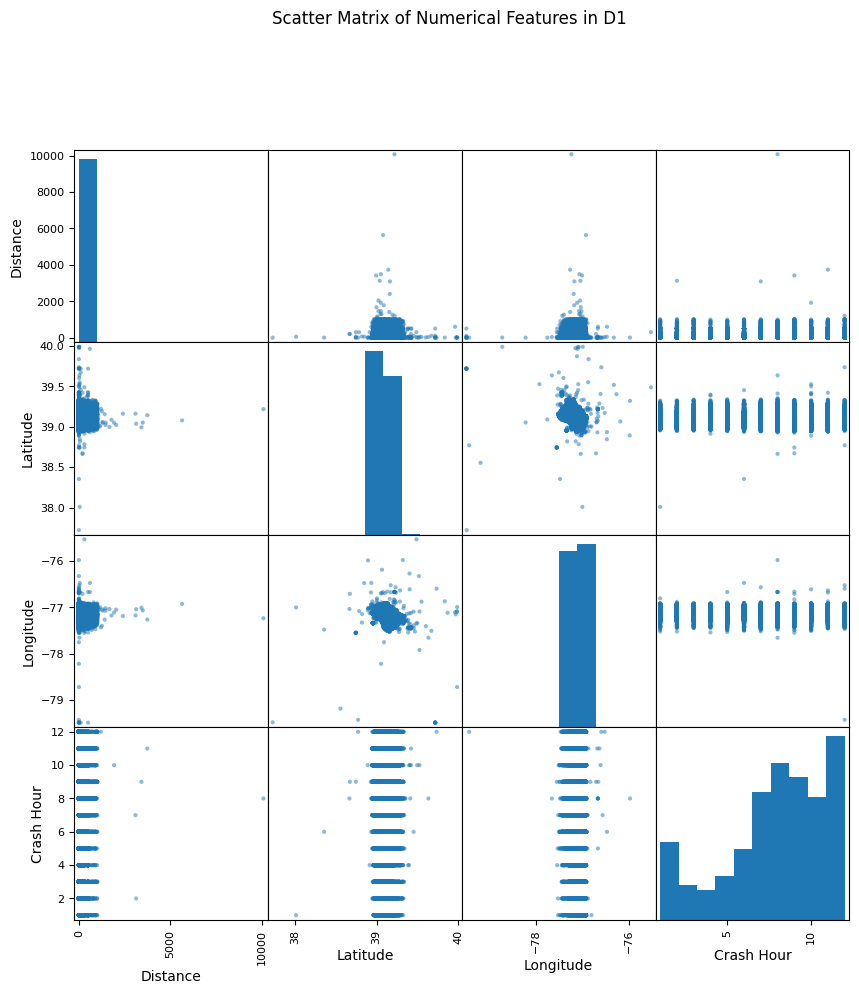

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns for the scatter matrix
numerical_cols_D1 = D1.select_dtypes(include=['float64', 'int64'])

# Create the scatter matrix using pandas
scatter_matrix_D1 = pd.plotting.scatter_matrix(numerical_cols_D1, figsize=(10, 10))
plt.suptitle('Scatter Matrix of Numerical Features in D1', y=1.02) # Add a title to the plot
plt.show()

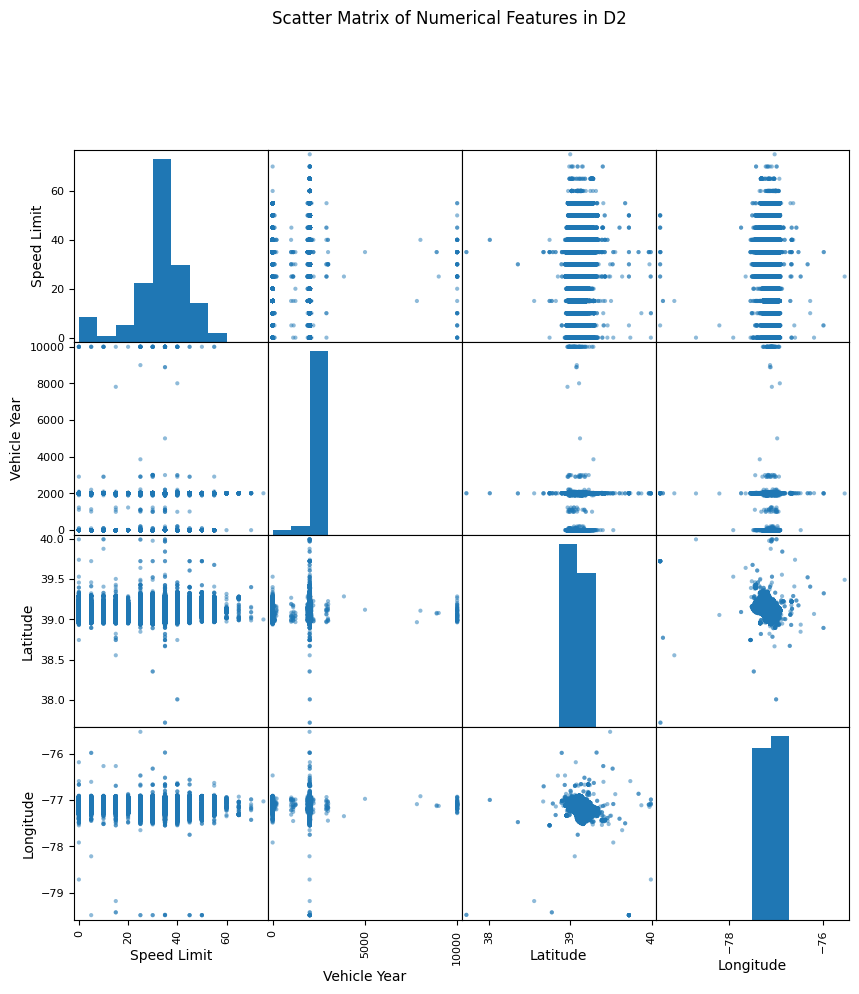

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns for the scatter matrix
numerical_cols_D2 = D2.select_dtypes(include=['float64', 'int64'])

# Create the scatter matrix using pandas
scatter_matrix_D2 = pd.plotting.scatter_matrix(numerical_cols_D2, figsize=(10, 10))
plt.suptitle('Scatter Matrix of Numerical Features in D2', y=1.02) # Add a title to the plot
plt.show()

**Interpretation of Pair Plots for D1 and D2:**

These pair plots visualize the relationships between all pairs of numerical features within the D1 and D2 datasets, respectively, and show the distribution of each individual numerical feature on the diagonal.

**D1 Pair Plot (Numerical Features: Distance, Latitude, Longitude, Crash Hour):**

*   **Diagonal:** The histograms/KDE plots on the diagonal show the distribution of each feature. You can see the frequency of different values for Distance, Latitude, Longitude, and Crash Hour in D1.
*   **Off-Diagonal:** The scatter plots show the pairwise relationships. For example, the scatter plot of Latitude vs. Longitude shows the geographical distribution of crashes in D1. You can observe clusters or patterns in where crashes occurred. The other scatter plots show relationships between Distance, Latitude, Longitude, and Crash Hour, though strong linear correlations might not be immediately apparent.

**D2 Pair Plot (Numerical Features: Speed Limit, Vehicle Year, Latitude, Longitude):**

*   **Diagonal:** The diagonal plots show the distribution of Speed Limit, Vehicle Year, Latitude, and Longitude in D2. The distribution of Speed Limit is particularly relevant to see the common speed limits at crash locations. The distribution of Vehicle Year might show the age of vehicles involved in crashes.
*   **Off-Diagonal:** The scatter plots show the pairwise relationships. The Latitude vs. Longitude plot again shows the geographical distribution of crashes, similar to D1 but for the data in D2. Other plots, like Speed Limit vs. Latitude or Longitude, could potentially reveal if certain speed limits are more common in specific geographical areas. The relationship between Vehicle Year and other numerical features might also be explored here.

By examining these pair plots, you can get a broad overview of the distributions of your numerical data and identify any obvious relationships or patterns between pairs of numerical variables within each dataset.

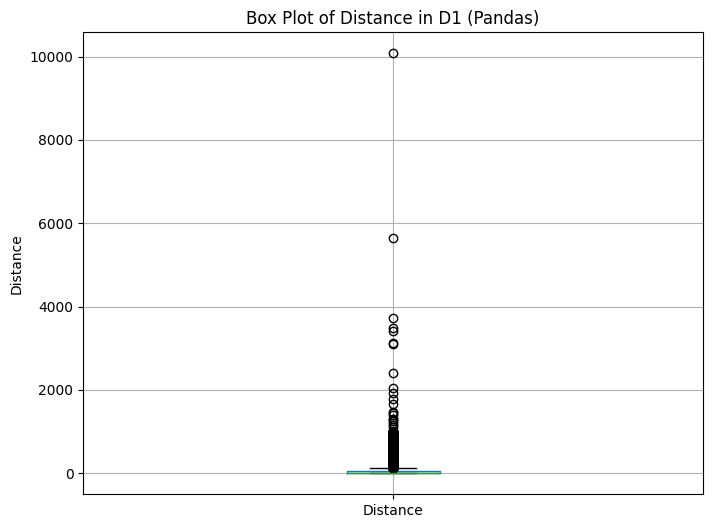

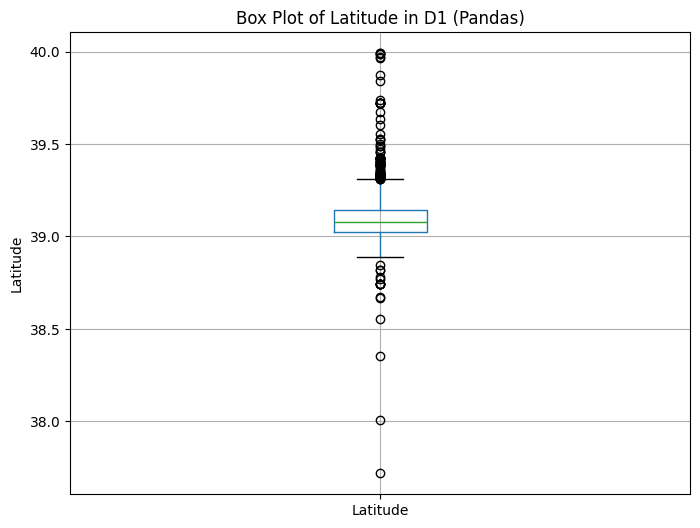

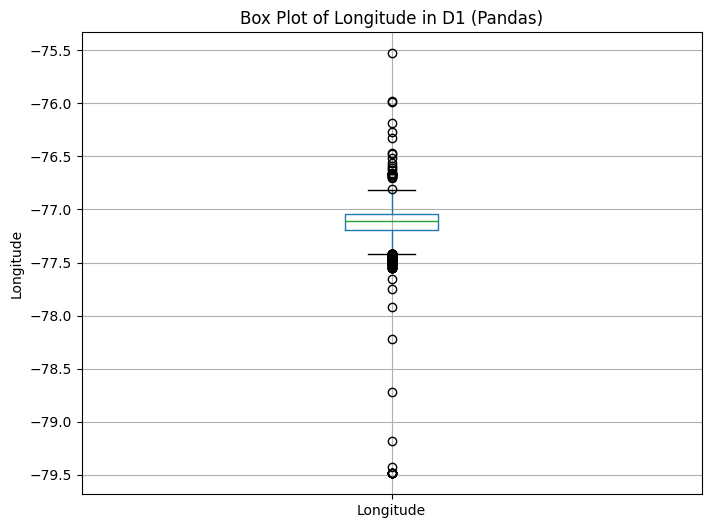

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

D1 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", low_memory=False)

# Convert 'Crash Date/Time' to datetime objects and extract Crash Hour
D1['Crash Date/Time'] = pd.to_datetime(D1['Crash Date/Time'], errors='coerce')
D1['Crash Hour'] = D1['Crash Date/Time'].dt.hour


numerical_cols_D1 = D1.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols_D1:
    plt.figure(figsize=(8, 6))
    D1.boxplot(column=col)
    plt.title(f'Box Plot of {col} in D1 (Pandas)')
    plt.ylabel(col)
    plt.show()

**Handling Outliers - Example: Removing Outliers from 'Distance' in D1**

One way to handle outliers is to remove them if they are likely due to data errors or are significantly distorting the analysis. Here, we will remove the outliers identified in the 'Distance' column of the D1 dataset using the IQR method.

In [68]:
# Calculate Q1, Q3, and IQR for 'Distance' in D1
Q1_distance = D1['Distance'].quantile(0.25)
Q3_distance = D1['Distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

# Define bounds for outliers
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

# Remove outliers from 'Distance' in D1
D1_cleaned = D1[(D1['Distance'] >= lower_bound_distance) & (D1['Distance'] <= upper_bound_distance)].copy()

print(f"Original shape of D1: {D1.shape}")
print(f"Shape of D1 after removing outliers in 'Distance': {D1_cleaned.shape}")

# Verify removal by checking for outliers in the cleaned data
outliers_distance_cleaned = D1_cleaned[(D1_cleaned['Distance'] < lower_bound_distance) | (D1_cleaned['Distance'] > upper_bound_distance)]
print(f"Number of outliers in 'Distance' after cleaning: {len(outliers_distance_cleaned)}")

Original shape of D1: (116093, 38)
Shape of D1 after removing outliers in 'Distance': (91341, 38)
Number of outliers in 'Distance' after cleaning: 0


**Dealing with Outliers**

Outliers are data points that significantly differ from other observations. They can affect statistical analyses and the performance of some models. In this section, we will identify and consider strategies for handling outliers in the numerical features of the datasets (D1, D2, and D3). Common approaches include:

*   **Identification:** Using methods like calculating the Interquartile Range (IQR) or plotting boxplots to visually identify outliers.
*   **Handling:** Depending on the nature of the outlier and the analysis goals, options include removing the outliers, transforming the data, or keeping them if they represent valid extreme values.

In [69]:
import numpy as np

numerical_cols_D1 = D1.select_dtypes(include=['float64', 'int64']).columns

outliers_D1 = {}
for col in numerical_cols_D1:
    Q1 = D1[col].quantile(0.25)
    Q3 = D1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = D1[(D1[col] < lower_bound) | (D1[col] > upper_bound)]
    outliers_D1[col] = outliers

    print(f"Potential outliers in '{col}' (D1) using IQR method:")
    display(outliers.head())
    print("-" * 30)

Potential outliers in 'Distance' (D1) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,Crash Hour
47,MCP1123002M,190010046,Montgomery County Police,Injury Crash,2019-03-04 08:41:00,No,Maryland (State),West,NaN,2,...,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.113113,-77.057592,"(39.11311333, -77.05759167)",8
333,MCP21610009,16028039,Montgomery County Police,Property Damage Crash,2016-06-04 19:14:00,Yes,County,East,NaN,1,...,OTHER VEHICLE,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",38.982443,-77.079235,"(38.98244333, -77.079235)",19
1863,MCP33190021,230049349,Montgomery County Police,Property Damage Crash,2023-08-14 08:50:00,No,County,Unknown,OTHER,0,...,NaN,OTHER,NaN,NaN,NaN,NaN,38.994612,-77.023368,"(38.99461167, -77.02336833)",8
1894,MCP22510019,15065527,MONTGOMERY,Property Damage Crash,2015-12-22 15:07:00,No,Maryland (State),North,NaN,1,...,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.155405,-77.012895,"(39.155405, -77.012895)",15
1896,DD5648000V,220026511,Rockville Police Departme,Property Damage Crash,2022-06-20 01:14:00,No,Municipality,South,NaN,1,...,EXPLOSION OR FIRE,NaN,NaN,STRAIGHT,NaN,"TWO-WAY, NOT DIVIDED",39.091241,-77.135636,"(39.09124112, -77.13563593)",1


------------------------------
Potential outliers in 'Latitude' (D1) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,Crash Hour
1303,MCP287500BK,250044375,MONTGOMERY,Property Damage Crash,2025-10-02 19:26:00,NaN,NaN,"Northbound, Southbound",Lane 1,2,...,Mailbox,Non-Junction,NaN,Straight,No Defects,Not Divided,39.336585,-77.186042,"(39.336585, -77.18604167)",19
1903,DM8423001K,180018490,Takoma Park Police Depart,Injury Crash,2018-04-16 08:45:00,No,Maryland (State),West,NaN,3,...,PARKED VEHICLE,INTERSECTION,FOUR-WAY INTERSECTION,STRAIGHT,NaN,"TWO-WAY, NOT DIVIDED",39.321550,-75.975952,"(39.32155002, -75.97595215)",8
2248,MCP2967002X,180008512,Montgomery County Police,Injury Crash,2018-02-18 15:15:00,No,Maryland (State),North,NaN,4,...,OTHER VEHICLE,INTERSECTION,T-INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.394768,-77.446772,"(39.39476833, -77.44677167)",15
2256,MCP1022004R,16020700,Montgomery County Police,Property Damage Crash,2016-04-27 09:58:00,No,Maryland (State),West,NaN,1,...,NaN,INTERSECTION,T-INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.323365,-77.204715,"(39.323365, -77.204715)",9
3083,MCP2254001W,180039943,Montgomery County Police,Property Damage Crash,2018-08-11 02:30:00,No,Maryland (State),North,NaN,1,...,OFF ROAD,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.313433,-77.198073,"(39.31343333, -77.19807333)",2


------------------------------
Potential outliers in 'Longitude' (D1) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,Crash Hour
167,MCP9392001T,250039074,MONTGOMERY,Property Damage Crash,2025-09-01 01:00:00,No,Maryland (State) Route,Eastbound,Lane 1,2,...,NaN,Non-Junction,NaN,Straight,No Defects,Not Divided,39.217183,-77.427610,"(39.21718333, -77.42761)",1
810,MCP23950036,250041917,MONTGOMERY,Property Damage Crash,2025-09-17 21:29:00,No,County Route,Southbound,Not Applicable,0,...,Tree (standing),Non-Junction,NaN,Curve Right,Holes Ruts Etc,Not Divided,39.104578,-77.471614,"(39.10457809, -77.47161447)",21
1221,MCP24870044,250043738,MONTGOMERY,Property Damage Crash,2025-09-29 08:05:00,No,Maryland (State) Route,Westbound,Lane 1,1,...,NaN,Non-Junction,NaN,Straight,No Defects,Not Divided,39.198114,-77.428890,"(39.19811433, -77.42889017)",8
1652,MCP24870045,250045917,MONTGOMERY,Injury Crash,2025-10-13 06:00:00,No,NaN,Northbound,Lane 1,1,...,Embankment,Intersection or Related,Perpendicular,Straight,No Defects,Not Divided,39.164765,-77.479792,"(39.16476467, -77.4797915)",6
1901,MCP24970016,180009727,Montgomery County Police,Property Damage Crash,2018-02-25 11:45:00,No,County,West,NaN,1,...,NaN,NaN,NaN,STRAIGHT,FOREIGN MATERIAL,"TWO-WAY, NOT DIVIDED",39.085393,-77.429945,"(39.08539333, -77.429945)",11


------------------------------


**Handling Outliers in D2 Dataset**

Based on the outlier identification in the previous step, we will now handle outliers in the numerical features of the D2 dataset. We will use the IQR method to remove data points that fall outside 1.5 times the IQR from the first and third quartiles for each numerical column.

In [70]:
import pandas as pd
import numpy as np

numerical_cols_D2 = D2.select_dtypes(include=['float64', 'int64']).columns

D2_cleaned = D2.copy()

for col in numerical_cols_D2:
    Q1 = D2_cleaned[col].quantile(0.25)
    Q3 = D2_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    D2_cleaned = D2_cleaned[(D2_cleaned[col] >= lower_bound) & (D2_cleaned[col] <= upper_bound)].copy()

    print(f"Shape of D2 after removing outliers in '{col}': {D2_cleaned.shape}")

print(f"\nOriginal shape of D2: {D2.shape}")
print(f"Final shape of D2 after removing outliers in all numerical columns: {D2_cleaned.shape}")

Shape of D2 after removing outliers in 'Speed Limit': (196750, 39)
Shape of D2 after removing outliers in 'Vehicle Year': (191323, 39)
Shape of D2 after removing outliers in 'Latitude': (190974, 39)
Shape of D2 after removing outliers in 'Longitude': (190517, 39)

Original shape of D2: (204688, 39)
Final shape of D2 after removing outliers in all numerical columns: (190517, 39)


In [71]:
import numpy as np

numerical_cols_D2 = D2.select_dtypes(include=['float64', 'int64']).columns

outliers_D2 = {}
for col in numerical_cols_D2:
    Q1 = D2[col].quantile(0.25)
    Q3 = D2[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = D2[(D2[col] < lower_bound) | (D2[col] > upper_bound)]
    outliers_D2[col] = outliers

    print(f"Potential outliers in '{col}' (D2) using IQR method:")
    display(outliers.head())
    print("-" * 30)

Potential outliers in 'Speed Limit' (D2) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
4,mcp312900d6,250034573,montgomery,property damage crash,08/03/2025 02:10:00 pm,NaN,NaN,NaN,parking lot way parking lot of 2741 uni...,NaN,...,not on roadway,0,no,no,2023,subaru,impreza,39.039662,-77.057238,"(39.03966248, -77.05723843)"
6,mcp2968005x,250037708,montgomery,injury crash,08/23/2025 11:50:00 am,maryland (state) route,rockville pike (sb/l),NaN,NaN,NaN,...,NaN,0,no,no,2025,mazda,cx-90,39.058466,-77.121265,"(39.05846583, -77.12126533)"
12,mcp3444000v,250035534,montgomery,property damage crash,08/09/2025 05:36:00 pm,NaN,NaN,NaN,parking lot way piney branch center par...,NaN,...,not on roadway,0,no,no,2016,gmc,sierra,38.998142,-77.002973,"(38.99814198, -77.00297324)"
17,mcp3444000w,250035654,montgomery,property damage crash,08/10/2025 06:10:00 pm,NaN,NaN,NaN,parking lot way 1002 quebec terrace apa...,NaN,...,NaN,0,no,yes,2012,honda,civic,39.000012,-76.990113,"(39.00001167, -76.99011333)"
41,mcp3304001x,250035441,montgomery,property damage crash,08/09/2025 05:15:00 am,NaN,NaN,NaN,parking stall parking lot between 1701 ...,NaN,...,not on roadway,0,no,no,2018,honda,cr-v,38.995967,-77.038263,"(38.9959665, -77.038263)"


------------------------------
Potential outliers in 'Vehicle Year' (D2) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
1,mcp2349001b,250037516,montgomery,property damage crash,08/22/2025 10:44:00 am,interstate (state),eisenhower memorial hwy,NaN,NaN,NaN,...,northbound,55,no,no,0,NaN,NaN,39.180181,-77.250657,"(39.18018079, -77.25065714)"
58,mcp3050006w,250037440,montgomery,property damage crash,08/21/2025 08:54:00 pm,maryland (state) route,layhill rd,NaN,NaN,NaN,...,northbound,35,no,no,0,NaN,NaN,39.090018,-77.044674,"(39.090018, -77.044674)"
60,mcp3168008h,250037462,montgomery,property damage crash,08/21/2025 10:45:00 pm,bicycle route,NaN,NaN,NaN,NaN,...,northbound,35,no,no,1985,honda,cb450,39.056209,-77.119080,"(39.0562091, -77.11907977)"
101,mcp31380083,250037728,montgomery,property damage crash,08/23/2025 02:02:00 pm,maryland (state) route,georgia ave,parker ave,NaN,NaN,...,northbound,35,no,no,0,NaN,NaN,39.049452,-77.051792,"(39.04945169, -77.05179167)"
181,mcp30400089,250034456,montgomery,property damage crash,08/02/2025 06:00:00 pm,maryland (state) route,NaN,NaN,NaN,NaN,...,westbound,20,no,no,0,NaN,NaN,39.130076,-77.029349,"(39.13007598, -77.02934937)"


------------------------------
Potential outliers in 'Latitude' (D2) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
2320,mcp287500bk,250044375,montgomery,property damage crash,10/02/2025 07:26:00 pm,NaN,NaN,NaN,NaN,NaN,...,northbound,50,no,no,2021,toyota,rav4 prime,39.336585,-77.186042,"(39.336585, -77.18604167)"
2502,mcp287500bk,250044375,montgomery,property damage crash,10/02/2025 07:26:00 pm,NaN,NaN,NaN,NaN,NaN,...,northbound,50,no,no,0,NaN,NaN,39.336585,-77.186042,"(39.336585, -77.18604167)"
3274,mcp20160036,180040948,montgomery county police,property damage crash,08/17/2018 02:25:00 pm,NaN,NaN,NaN,parking lot of 16246 frederick rd,NaN,...,west,15,no,no,2015,mazd,tk,38.743373,-77.546997,"(38.743373, -77.54699707)"
3563,mcp25280005,230052676,montgomery county police,injury crash,09/01/2023 03:35:00 pm,county,clarksburg rd,woodview dr,NaN,NaN,...,north,35,no,no,2021,dodge,ram,39.324076,-77.229429,"(39.32407595, -77.22942928)"
4112,mcp25280005,230052676,montgomery county police,injury crash,09/01/2023 03:35:00 pm,county,clarksburg rd,woodview dr,NaN,NaN,...,north,35,no,no,2017,kia,sw,39.324076,-77.229429,"(39.32407595, -77.22942928)"


------------------------------
Potential outliers in 'Longitude' (D2) using IQR method:


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
499,mcp9392001t,250039074,montgomery,property damage crash,09/01/2025 01:00:00 am,maryland (state) route,dickerson rd,NaN,NaN,NaN,...,eastbound,30,no,no,2021,chevrolet,tahoe,39.217183,-77.427610,"(39.21718333, -77.42761)"
590,mcp15680028,250039480,montgomery,property damage crash,09/03/2025 03:06:00 pm,maryland (state) route,beallsville rd,NaN,NaN,NaN,...,northbound,40,no,no,2018,subaru,forester,39.172106,-77.416245,"(39.17210621, -77.41624545)"
857,mcp15680028,250039480,montgomery,property damage crash,09/03/2025 03:06:00 pm,maryland (state) route,beallsville rd,NaN,NaN,NaN,...,northbound,40,no,no,2023,kia,sportage,39.172106,-77.416245,"(39.17210621, -77.41624545)"
1493,mcp23950036,250041917,montgomery,property damage crash,09/17/2025 09:29:00 pm,county route,river rd,edwards ferry rd,NaN,NaN,...,southbound,30,no,no,2023,toyota,corolla,39.104578,-77.471614,"(39.10457809, -77.47161447)"
1955,mcp24870044,250043738,montgomery,property damage crash,09/29/2025 08:05:00 am,maryland (state) route,NaN,NaN,NaN,NaN,...,westbound,50,no,no,2024,freightliner,b2 bus chassis,39.198114,-77.428890,"(39.19811433, -77.42889017)"


------------------------------


**Interpretation of Outliers:**

Based on the box plots and the potential outliers identified by the IQR method in D1 and D2:

*   **Distance (D1):** Outliers with large distance values might represent crashes recorded at unusual distances from a reference point.
*   **Latitude and Longitude (D1 and D2):** Geographical outliers indicate crashes occurring at locations significantly outside the main cluster of accidents in Montgomery County. These could be valid extreme locations or data errors.
*   **Speed Limit (D2):** Outliers include very low speed limits (potentially from off-road areas or data issues) and very high speed limits (likely from highways, and extreme values might need checking).
*   **Vehicle Year (D2):** Outliers might represent vehicles with unusually old or new model years involved in crashes, or potentially data entry errors for the year.

These identified outliers highlight data points that are statistically unusual and warrant further investigation to determine if they are valid extreme values or data errors before deciding on a handling strategy.